In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
text="Hi my name is Melvin, I'm pursuing my Masters degree in A.I. Joined Christ(Deemed to be University) on 18-July-2023, my contact details are infantmelvin16@gmail.com for mail and 9897969594 for direct calls. Happy to share!"
print(text)

Hi my name is Melvin, I'm pursuing my Masters degree in A.I. Joined Christ(Deemed to be University) on 18-July-2023, my contact details are infantmelvin16@gmail.com for mail and 9897969594 for direct calls. Happy to share!


Unique tokens

In [3]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
tokens=word_tokenize(text)
freq=FreqDist(tokens)
unique=freq.N()
print("Unique tokens: ",unique)

Unique tokens:  45


Without punctuations

In [4]:
import string
punctuation = [token for token in tokens if token in string.punctuation]
normal_tokens = [token for token in tokens if token not in string.punctuation]
punctuation_count = len(punctuation)
text_without_punctuation = " ".join(normal_tokens)
print("Number of punctuation characters:", punctuation_count)
print("Text without punctuation:", text_without_punctuation)

Number of punctuation characters: 8
Text without punctuation: Hi my name is Melvin I 'm pursuing my Masters degree in A.I Joined Christ Deemed to be University on 18-July-2023 my contact details are infantmelvin16 gmail.com for mail and 9897969594 for direct calls Happy to share


Plotting stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


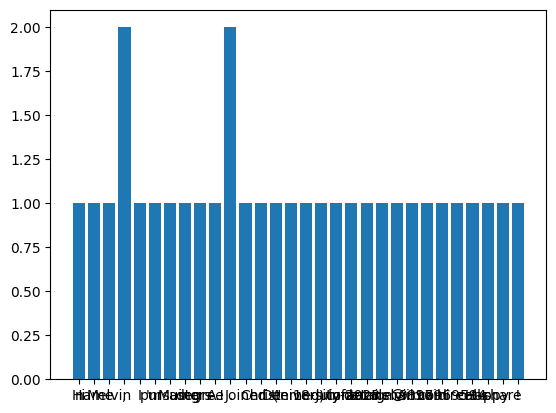

<Figure size 3000x2000 with 0 Axes>

Text without stopwords: Hi name Melvin , I 'm pursuing Masters degree A.I . Joined Christ ( Deemed University ) 18-July-2023 , contact details infantmelvin16 @ gmail.com mail 9897969594 direct calls . Happy share !


In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stop_words = stopwords.words('english')
filtered_tokens = [token for token in tokens if token not in stop_words]
stopword_counts = {}
for token in filtered_tokens:
    if token in stopword_counts:
        stopword_counts[token] += 1
    else:
        stopword_counts[token] = 1
stopwords = list(stopword_counts.keys())
counts = list(stopword_counts.values())
plt.bar(stopwords, counts)
plt.figure(figsize=(30,20))
plt.show()
text_without_stopwords = " ".join(filtered_tokens)
print("Text without stopwords:", text_without_stopwords)

Distribution of POS

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


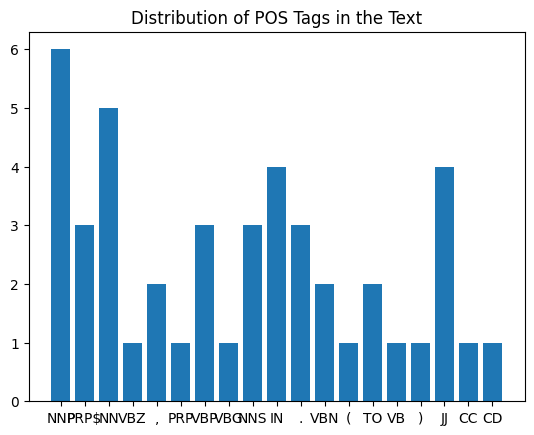

<Figure size 3000x4000 with 0 Axes>

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import brown
from nltk.tag import pos_tag
tagged_tokens = pos_tag(tokens)
pos_tags = [tag for word, tag in tagged_tokens]
pos_tag_counts = {}
for tag in pos_tags:
    pos_tag_counts[tag] = pos_tag_counts.get(tag, 0) + 1
pos_tags, counts = zip(*pos_tag_counts.items())
plt.bar(pos_tags, counts)
plt.title("Distribution of POS Tags in the Text")
plt.figure(figsize=(30,40))
plt.show()

Lemma

In [7]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
unique_lemmas = set([lemmatizer.lemmatize(token) for token in tokens])
print("Number of unique lemmas:", len(unique_lemmas))

[nltk_data] Downloading package wordnet to /root/nltk_data...


Number of unique lemmas: 39


frequency distribution of words in the text




In [8]:
tokens = [token for token in tokens if token.isalpha()]
freq_dist = FreqDist(tokens)
print(freq_dist)
top_tokens = freq_dist.most_common(10)

<FreqDist with 27 samples and 31 outcomes>


the top 10 tokens in the chart

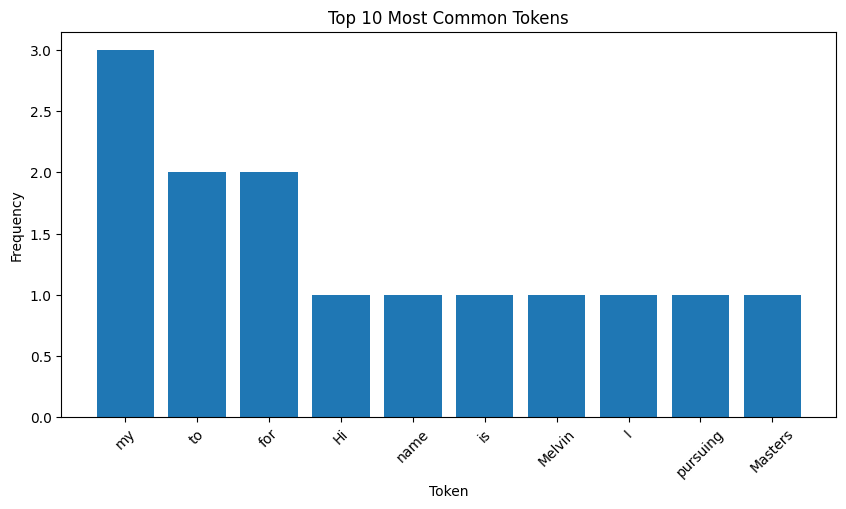

In [9]:
tokens = [token for token, freq in top_tokens]
frequencies = [freq for token, freq in top_tokens]
plt.figure(figsize=(10, 5))
plt.bar(tokens, frequencies)
plt.title('Top 10 Most Common Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Distribution of POS

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


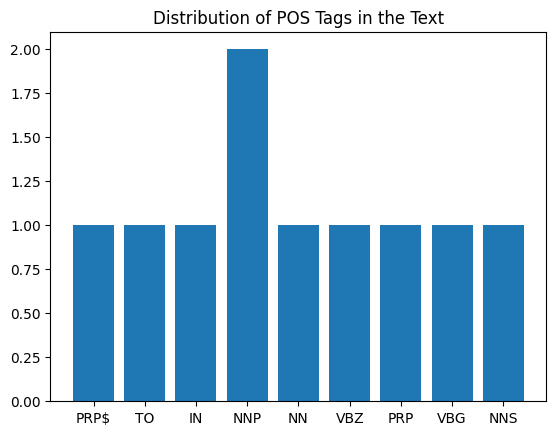

<Figure size 6000x4000 with 0 Axes>

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import brown
from nltk.tag import pos_tag
tagged_tokens = pos_tag(tokens)
pos_tags = [tag for word, tag in tagged_tokens]
pos_tag_counts = {}
for tag in pos_tags:
    pos_tag_counts[tag] = pos_tag_counts.get(tag, 0) + 1
pos_tags, counts = zip(*pos_tag_counts.items())
plt.bar(pos_tags, counts)
plt.title("Distribution of POS Tags in the Text")
plt.figure(figsize=(60,40))
plt.show()

Unigrams, Trigrams and Quadgrams

In [11]:
from nltk import ngrams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
quadgrams = list(ngrams(tokens, 4))
unique_bigrams = set(bigrams)
unique_trigrams = set(trigrams)
unique_quadgrams = set(quadgrams)
num_unique_bigrams = len(unique_bigrams)
num_unique_trigrams = len(unique_trigrams)
num_unique_quadgrams = len(unique_quadgrams)
print("Number of unique bigrams:", num_unique_bigrams)
print("Number of unique trigrams:", num_unique_trigrams)
print("Number of unique quadgrams:", num_unique_quadgrams)

Number of unique bigrams: 9
Number of unique trigrams: 8
Number of unique quadgrams: 7


Converting dates to DD-MM-YYYY format:

In [12]:
import re
date_pattern = r'\b\d{1,2}-(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)-\d{4}\b'
dates = re.findall(date_pattern, text)
def convert_to_dd_mm_yyyy(date):
    day, month, year = date.split('-')
    month_number = {
        'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
        'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }
    return f"{day.zfill(2)}-{month_number[month[:3]]}-{year}"
converted_dates = [convert_to_dd_mm_yyyy(date) for date in dates]
print("Converted dates:", converted_dates)

Converted dates: ['18-07-2023']


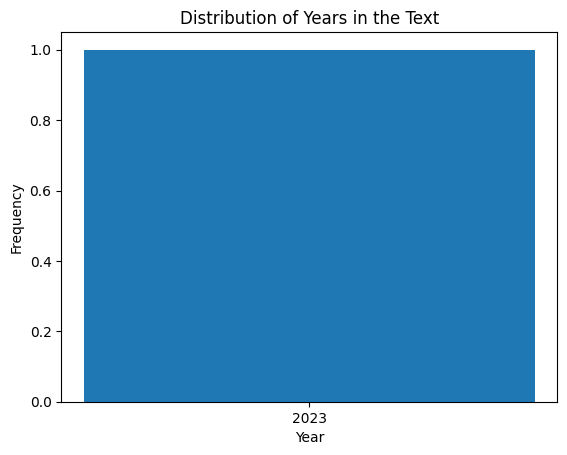

In [13]:
years = re.findall(r"\b\d{4}\b", text)
if years:
    year_counts = {}
    for year in years:
        year_counts[year] = year_counts.get(year, 0) + 1
    plt.bar(year_counts.keys(), year_counts.values())
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.title("Distribution of Years in the Text")
    plt.show()

In [14]:
potential_numbers = re.findall(r"\b[\d()+\- ]{10,}\b", text)
if not potential_numbers:
    print("No phone numbers found in the text.")
else:
    print("Found potential phone numbers:")
    for number in potential_numbers:
        print(number)

Found potential phone numbers:
 9897969594 
